# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities


Number of cities in the list: 588


['lethem',
 'adamstown',
 'afaahiti',
 'port-aux-francais',
 'kupang',
 'ushuaia',
 'ribeira grande',
 'margaret river',
 'page',
 'port elizabeth',
 'bethel',
 'bairnsdale',
 'isafjordur',
 'al ghayzah',
 'obuase',
 'waitangi',
 'port hedland',
 'hermanus',
 'invercargill',
 'grytviken',
 'klyuchi',
 'yellowknife',
 'lorengau',
 'papatowai',
 'gadzhiyevo',
 'saint-pierre',
 'hithadhoo',
 'dryden',
 "mel'nikovo",
 'ituango',
 'puerto natales',
 "ust'-labinsk",
 'bredasdorp',
 'tosontsengel',
 'bukama',
 'udachny',
 'key largo',
 "vrangel'",
 'weno',
 'lagoa',
 'harare',
 'yuzhno-kurilsk',
 'chhuikhadan',
 'arys',
 'morondava',
 'new norfolk',
 'thompson',
 'taltal',
 'albany',
 'west island',
 'cuatro cienegas de carranza',
 'kingston',
 'port mathurin',
 'road town',
 'qaqortoq',
 'blackmans bay',
 'porto novo',
 'veinticinco de mayo',
 'vorgashor',
 'nizhniy ingash',
 'pathein',
 'wamba',
 'saint-philippe',
 'pecan plantation',
 'dunedin',
 'luanco',
 'wailua homesteads',
 'la passe'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + "imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
    
        city_lng = city_weather['coord']['lon']
        
        city_max_temp = city_weather['main']['temp_max']
        
        city_humidity = city_weather['main']['humidity']
        
        city_clouds = city_weather['clouds']['all']
        
        city_wind = city_weather['wind']['speed']
        
        city_country = city_weather['sys']['country']
        
        city_date = city_weather['dt']

        
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lethem
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | afaahiti
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | kupang
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | page
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | bairnsdale
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | al ghayzah
Processing Record 15 of Set 1 | obuase
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | port hedland
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | klyuchi
Processing Record 22 of Set 1 | yellowknife
Processing Reco

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lethem,3.3803,-59.7968,92.80,45,98,8.03,GY,1711821296
1,adamstown,-25.0660,-130.1015,73.62,68,100,28.25,PN,1711821296
2,afaahiti,-17.7500,-149.2833,82.27,83,89,22.62,PF,1711821296
3,port-aux-francais,-49.3500,70.2167,43.03,94,100,16.22,TF,1711821297
4,kupang,-10.1667,123.5833,79.38,100,100,2.30,ID,1711821297


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lethem,3.3803,-59.7968,92.80,45,98,8.03,GY,1711821296
1,adamstown,-25.0660,-130.1015,73.62,68,100,28.25,PN,1711821296
2,afaahiti,-17.7500,-149.2833,82.27,83,89,22.62,PF,1711821296
3,port-aux-francais,-49.3500,70.2167,43.03,94,100,16.22,TF,1711821297
4,kupang,-10.1667,123.5833,79.38,100,100,2.30,ID,1711821297


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

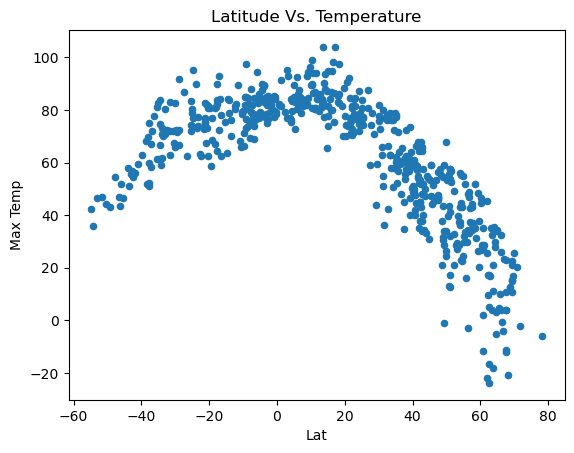

In [80]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", title="Latitude Vs. Temperature")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

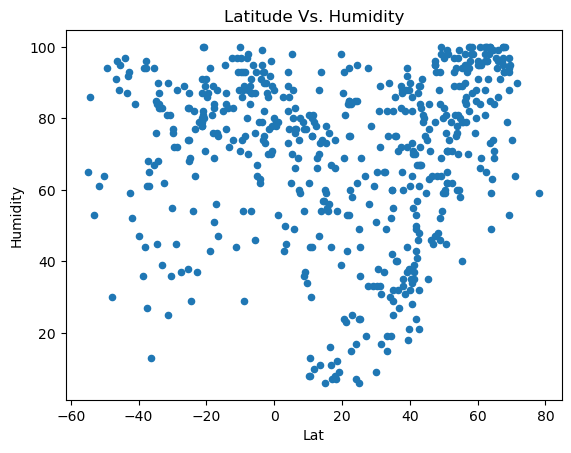

In [81]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", title="Latitude Vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

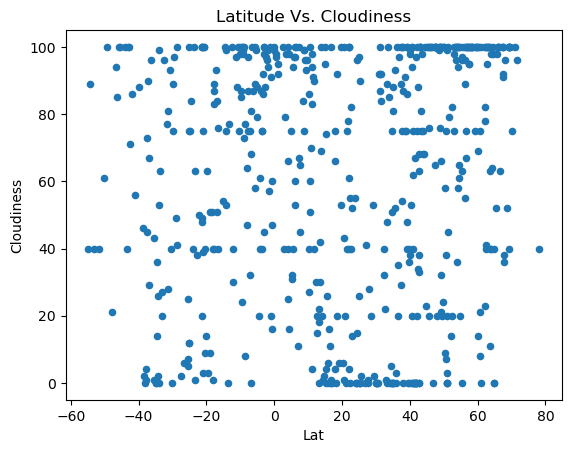

In [82]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", title="Latitude Vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

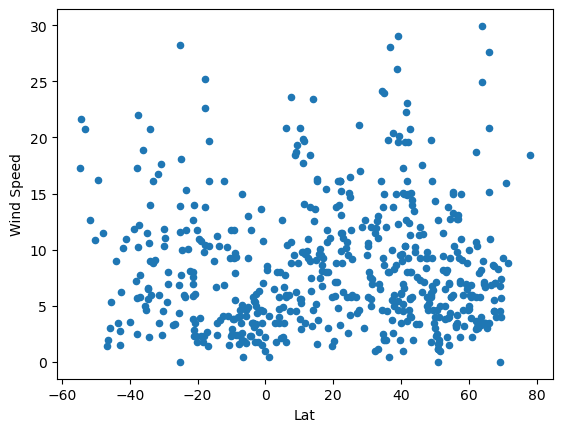

In [83]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation is: {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [85]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']>=0)])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lethem,3.3803,-59.7968,92.80,45,98,8.03,GY,1711821296
6,ribeira grande,38.5167,-28.7000,59.40,82,75,14.97,PT,1711820756
8,page,36.9147,-111.4558,65.68,27,97,28.01,US,1711820756
10,bethel,41.3712,-73.4140,57.18,39,0,12.66,US,1711821298
12,isafjordur,66.0755,-23.1240,26.13,86,100,27.63,IS,1711821299


In [86]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']<0)])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,73.62,68,100,28.25,PN,1711821296
2,afaahiti,-17.7500,-149.2833,82.27,83,89,22.62,PF,1711821296
3,port-aux-francais,-49.3500,70.2167,43.03,94,100,16.22,TF,1711821297
4,kupang,-10.1667,123.5833,79.38,100,100,2.30,ID,1711821297
5,ushuaia,-54.8000,-68.3000,42.46,65,40,17.27,AR,1711820523


###  Temperature vs. Latitude Linear Regression Plot

The correlation is: -0.88
The r-squared is: 0.7782470477552528


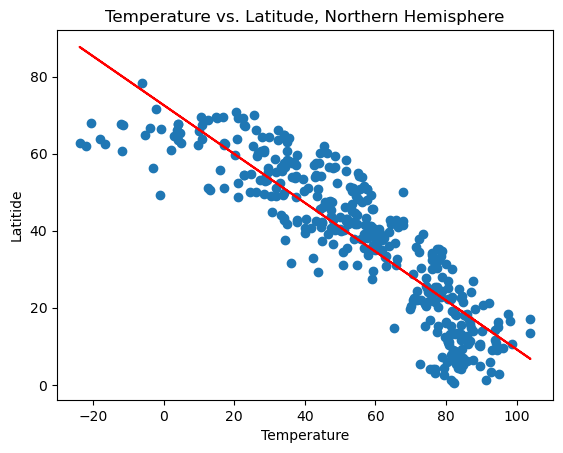

In [87]:
# Linear regression on Northern Hemisphere
plt.title("Temperature vs. Latitude, Northern Hemisphere")
plt.xlabel("Temperature")
plt.ylabel("Latitide")
linear_regression(northern_hemi_df["Max Temp"], northern_hemi_df["Lat"])


The correlation is: 0.72
The r-squared is: 0.520486967371907


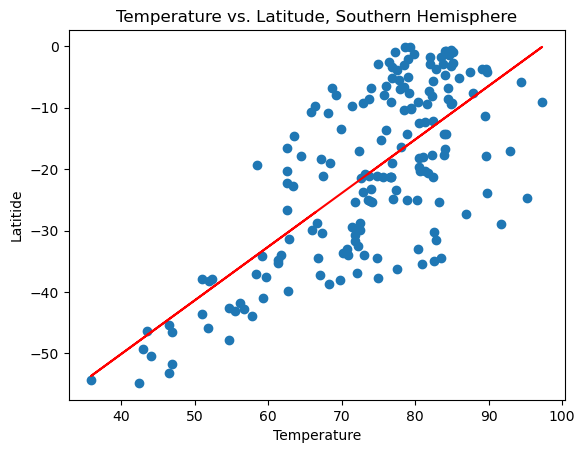

In [88]:
# Linear regression on Southern Hemisphere
plt.title("Temperature vs. Latitude, Southern Hemisphere")
plt.xlabel("Temperature")
plt.ylabel("Latitide")
linear_regression(southern_hemi_df["Max Temp"], southern_hemi_df["Lat"])

**Discussion about the linear relationship:** There is a strong correlation between Latitude and Max Temps. There is a consistent decrease in Max Temps the further away you get from the equator as shown by lower temperature values for higher positive or negative latitudes in the northern and southern hemispheres, respectively.

### Humidity vs. Latitude Linear Regression Plot

The correlation is: 0.39
The r-squared is: 0.1505415453964034


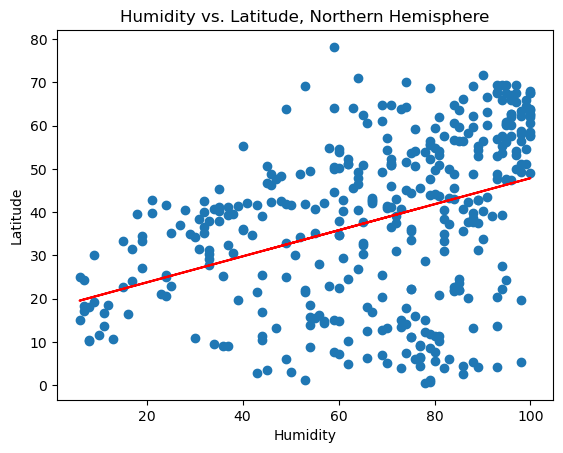

In [89]:
# Northern Hemisphere
plt.title("Humidity vs. Latitude, Northern Hemisphere")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
linear_regression(northern_hemi_df["Humidity"], northern_hemi_df["Lat"])

The correlation is: 0.23
The r-squared is: 0.05422359732802793


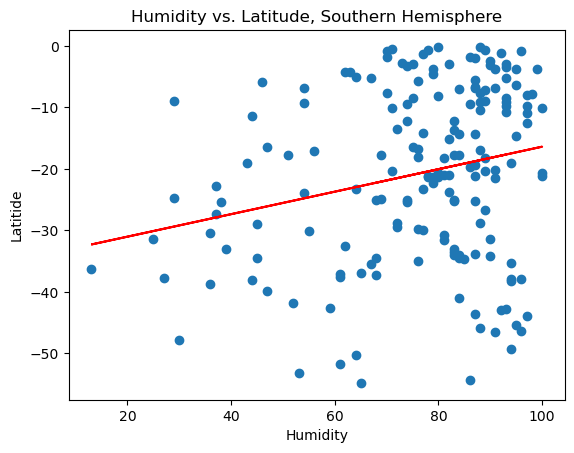

In [90]:
# Southern Hemisphere
plt.title("Humidity vs. Latitude, Southern Hemisphere")
plt.xlabel("Humidity")
plt.ylabel("Latitide")
linear_regression(southern_hemi_df["Humidity"], southern_hemi_df["Lat"])

**Discussion about the linear relationship:** There isn't a significantly meaningful relationship between Humidity and Latitude

### Cloudiness vs. Latitude Linear Regression Plot

The correlation is: 0.21
The r-squared is: 0.04430649666468328


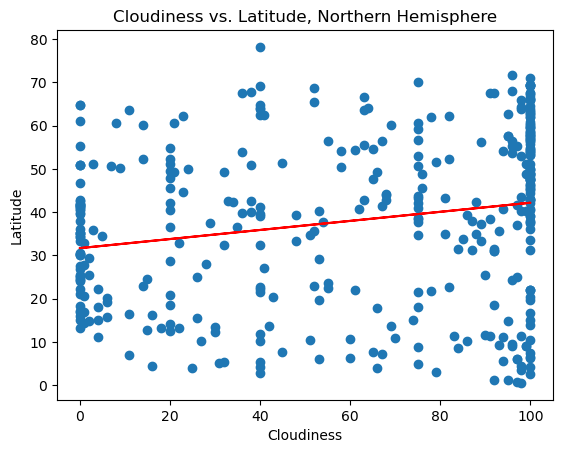

In [91]:
# Northern Hemisphere
plt.title("Cloudiness vs. Latitude, Northern Hemisphere")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
linear_regression(northern_hemi_df["Cloudiness"], northern_hemi_df["Lat"])

The correlation is: 0.22
The r-squared is: 0.04912964301223161


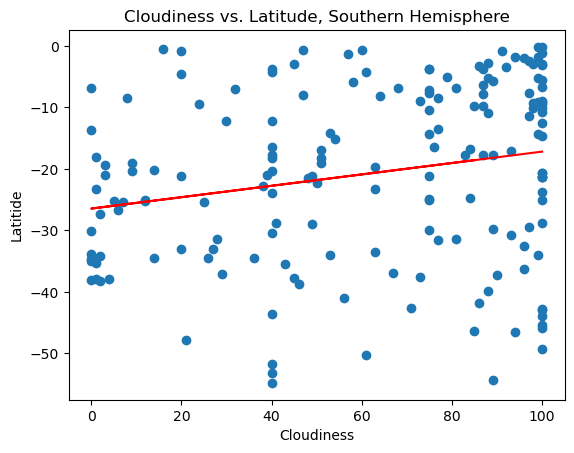

In [92]:
# Southern Hemisphere
# Southern Hemisphere
plt.title("Cloudiness vs. Latitude, Southern Hemisphere")
plt.xlabel("Cloudiness")
plt.ylabel("Latitide")
linear_regression(southern_hemi_df["Cloudiness"], southern_hemi_df["Lat"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The correlation is: -0.09
The r-squared is: 0.00820192806114341


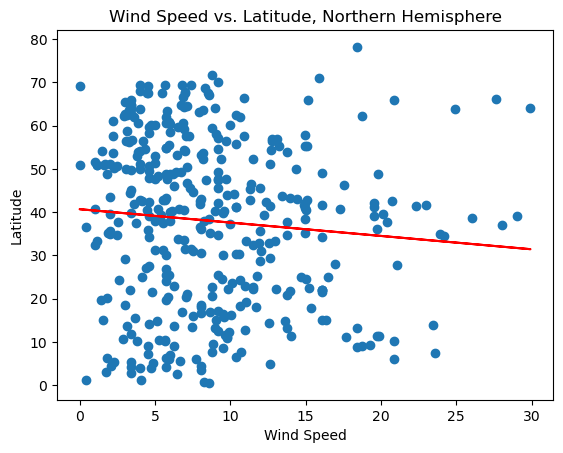

In [93]:
# Northern Hemisphere
plt.title("Wind Speed vs. Latitude, Northern Hemisphere")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
linear_regression(northern_hemi_df["Wind Speed"], northern_hemi_df["Lat"])

The correlation is: -0.32
The r-squared is: 0.10510633845385745


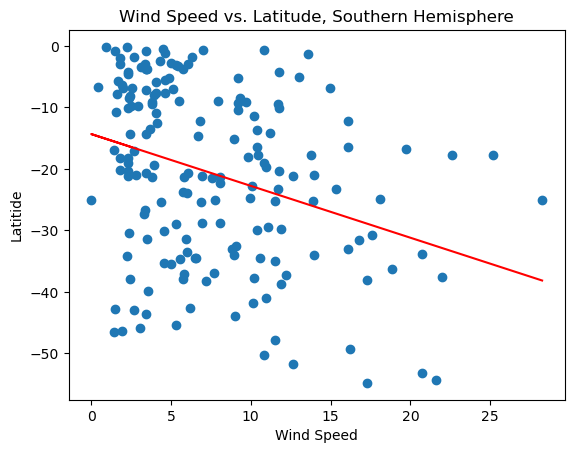

In [95]:
# Southern Hemisphere
# Southern Hemisphere
plt.title("Wind Speed vs. Latitude, Southern Hemisphere")
plt.xlabel("Wind Speed")
plt.ylabel("Latitide")
linear_regression(southern_hemi_df["Wind Speed"], southern_hemi_df["Lat"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE